In [1]:
import pandas as pd
import numpy as np

In [2]:
train_data = pd.read_csv('./data/train.csv')

In [3]:
train_data.head()

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1,28.0,Company Invited,1,10.0,Small Business,Male,3,4.0,Basic,3.0,Married,3.0,0,1,0,1.0,Executive,20384.0,0
1,2,34.0,Self Enquiry,3,NaN,Small Business,Female,2,4.0,Deluxe,4.0,Single,1.0,1,5,1,0.0,Manager,19599.0,1
2,3,45.0,Company Invited,1,NaN,Salaried,Male,2,3.0,Deluxe,4.0,Married,2.0,0,4,1,0.0,Manager,NaN,0
3,4,29.0,Company Invited,1,7.0,Small Business,Male,3,5.0,Basic,4.0,Married,3.0,0,4,0,1.0,Executive,21274.0,1
4,5,42.0,Self Enquiry,3,6.0,Salaried,Male,2,3.0,Deluxe,3.0,Divorced,2.0,0,3,1,0.0,Manager,19907.0,0


- id : 샘플 아이디
- Age : 나이
- TypeofContact : 고객의 제품 인지 방법 (회사의 홍보 or 스스로 검색)
- CityTier : 주거 중인 도시의 등급. (인구, 시설, 생활 수준 기준) (1등급 > 2등급 > 3등급) 
- DurationOfPitch : 영업 사원이 고객에게 제공하는 프레젠테이션 기간
- Occupation : 직업
- Gender : 성별
- NumberOfPersonVisiting : 고객과 함께 여행을 계획 중인 총 인원
- NumberOfFollowups : 영업 사원의 프레젠테이션 후 이루어진 후속 조치 수
- ProductPitched : 영업 사원이 제시한 상품
- PreferredPropertyStar : 선호 호텔 숙박업소 등급
- MaritalStatus : 결혼여부
- NumberOfTrips : 평균 연간 여행 횟수
- Passport : 여권 보유 여부 (0: 없음, 1: 있음)
- PitchSatisfactionScore : 영업 사원의 프레젠테이션 만족도
- OwnCar : 자동차 보유 여부 (0: 없음, 1: 있음)
- NumberOfChildrenVisiting : 함께 여행을 계획 중인 5세 미만의 어린이 수
- Designation : (직업의) 직급
- MonthlyIncome : 월 급여
- ProdTaken : 여행 패키지 신청 여부 (0: 신청 안 함, 1: 신청함)


# EDA

In [4]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # Windows
matplotlib.rcParams['font.size'] = 15 # 글자 크기
matplotlib.rcParams['axes.unicode_minus'] = False 
import seaborn as sns
import sklearn.preprocessing

import warnings
warnings.filterwarnings(action='ignore')

- 결측치 확인

In [5]:
train_data.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1955 entries, 0 to 1954
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1955 non-null   int64  
 1   Age                       1861 non-null   float64
 2   TypeofContact             1945 non-null   object 
 3   CityTier                  1955 non-null   int64  
 4   DurationOfPitch           1853 non-null   float64
 5   Occupation                1955 non-null   object 
 6   Gender                    1955 non-null   object 
 7   NumberOfPersonVisiting    1955 non-null   int64  
 8   NumberOfFollowups         1942 non-null   float64
 9   ProductPitched            1955 non-null   object 
 10  PreferredPropertyStar     1945 non-null   float64
 11  MaritalStatus             1955 non-null   object 
 12  NumberOfTrips             1898 non-null   float64
 13  Passport                  1955 non-null   int64  
 14  PitchSat

- 결측치가 다양하게 발생
- 결측치를 함부로 0이나 평균으로 대체할 수 없음

---
- 숫자형은 소수가 없음 -> float64를 int64로 변환해도 됨


- 변환하기 위해 일단 결측치 있는 데이터를 제외함

In [6]:
train_data2 = train_data.dropna().reset_index(drop=True)

In [7]:
# float64인 Age, DurationOfPitch, NumberOfFollowups
# PreferredPropertyStar, NumberOfTrips, NumberOfChildrenVisiting, MonthlyIncome
# 을 int64형으로 변환
train_data2 = train_data2.astype({'Age':'int32'})
train_data2 = train_data2.astype({'DurationOfPitch':'int32'})
train_data2 = train_data2.astype({'NumberOfFollowups':'int32'})
train_data2 = train_data2.astype({'PreferredPropertyStar':'int32'})
train_data2 = train_data2.astype({'NumberOfTrips':'int32'})
train_data2 = train_data2.astype({'NumberOfChildrenVisiting':'int32'})
train_data2 = train_data2.astype({'MonthlyIncome':'int32'})
train_data2

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1,28,Company Invited,1,10,Small Business,Male,3,4,Basic,3,Married,3,0,1,0,1,Executive,20384,0
1,4,29,Company Invited,1,7,Small Business,Male,3,5,Basic,4,Married,3,0,4,0,1,Executive,21274,1
2,5,42,Self Enquiry,3,6,Salaried,Male,2,3,Deluxe,3,Divorced,2,0,3,1,0,Manager,19907,0
3,6,32,Self Enquiry,1,29,Small Business,Male,4,4,Deluxe,3,Divorced,3,1,5,1,1,Manager,24857,1
4,7,43,Company Invited,3,8,Salaried,Male,3,3,Deluxe,3,Married,2,0,3,1,2,Manager,20675,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644,1951,28,Self Enquiry,1,10,Small Business,Male,3,5,Basic,3,Single,2,0,1,1,2,Executive,20723,0
1645,1952,41,Self Enquiry,3,8,Salaried,Female,3,3,Super Deluxe,5,Divorced,1,0,5,1,1,AVP,31595,0
1646,1953,38,Company Invited,3,28,Small Business,Female,3,4,Basic,3,Divorced,7,0,2,1,2,Executive,21651,0
1647,1954,28,Self Enquiry,3,30,Small Business,Female,3,5,Deluxe,3,Married,3,0,1,1,2,Manager,22218,0


In [8]:
# object형인 TypeofContact, Occupation, Gender, ProductPitched, MaritalStatus, Designation
# TypeofContact는 2개
train_data2['TypeofContact'].unique()

array(['Company Invited', 'Self Enquiry'], dtype=object)

In [9]:
# Occupation은 4개
train_data2['Occupation'].unique()

array(['Small Business', 'Salaried', 'Large Business', 'Free Lancer'],
      dtype=object)

In [10]:
# 성별 3개
# Fe Male은 오타인가? 분석할 필요성이 있어보임
train_data2['Gender'].unique()

array(['Male', 'Fe Male', 'Female'], dtype=object)

In [11]:
# ProductPitched는 5개
train_data2['ProductPitched'].unique()

array(['Basic', 'Deluxe', 'Standard', 'Super Deluxe', 'King'],
      dtype=object)

In [12]:
# MaritalStatus는 4개
train_data2['MaritalStatus'].unique()

array(['Married', 'Divorced', 'Unmarried', 'Single'], dtype=object)

In [13]:
# Designation은 5개
train_data2['Designation'].unique()

array(['Executive', 'Manager', 'Senior Manager', 'AVP', 'VP'],
      dtype=object)

In [14]:
# sklearn에서 제공하는 label encoder로 object형을 int형으로 labeling
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
train_data2['TypeofContact']=label_encoder.fit_transform(train_data2['TypeofContact'])
train_data2['Occupation']=label_encoder.fit_transform(train_data2['Occupation'])
train_data2['Gender']=label_encoder.fit_transform(train_data2['Gender'])
train_data2['ProductPitched']=label_encoder.fit_transform(train_data2['ProductPitched'])
train_data2['MaritalStatus']=label_encoder.fit_transform(train_data2['MaritalStatus'])
train_data2['Designation']=label_encoder.fit_transform(train_data2['Designation'])
train_data2

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1,28,0,1,10,3,2,3,4,0,3,1,3,0,1,0,1,1,20384,0
1,4,29,0,1,7,3,2,3,5,0,4,1,3,0,4,0,1,1,21274,1
2,5,42,1,3,6,2,2,2,3,1,3,0,2,0,3,1,0,2,19907,0
3,6,32,1,1,29,3,2,4,4,1,3,0,3,1,5,1,1,2,24857,1
4,7,43,0,3,8,2,2,3,3,1,3,1,2,0,3,1,2,2,20675,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644,1951,28,1,1,10,3,2,3,5,0,3,2,2,0,1,1,2,1,20723,0
1645,1952,41,1,3,8,2,1,3,3,4,5,0,1,0,5,1,1,0,31595,0
1646,1953,38,0,3,28,3,1,3,4,0,3,0,7,0,2,1,2,1,21651,0
1647,1954,28,1,3,30,3,1,3,5,1,3,1,3,0,1,1,2,2,22218,0


In [15]:
train_data2['TypeofContact'].unique()

array([0, 1])

In [16]:
train_data2['Occupation'].unique()

array([3, 2, 1, 0])

In [17]:
train_data2['Gender'].unique()

array([2, 0, 1])

In [18]:
train_data2['ProductPitched'].unique()

array([0, 1, 3, 4, 2])

In [19]:
train_data2['MaritalStatus'].unique()

array([1, 0, 3, 2])

In [20]:
train_data2['Designation'].unique()

array([1, 2, 3, 0, 4])

In [21]:
train_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1649 entries, 0 to 1648
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   id                        1649 non-null   int64
 1   Age                       1649 non-null   int32
 2   TypeofContact             1649 non-null   int32
 3   CityTier                  1649 non-null   int64
 4   DurationOfPitch           1649 non-null   int32
 5   Occupation                1649 non-null   int32
 6   Gender                    1649 non-null   int32
 7   NumberOfPersonVisiting    1649 non-null   int64
 8   NumberOfFollowups         1649 non-null   int32
 9   ProductPitched            1649 non-null   int32
 10  PreferredPropertyStar     1649 non-null   int32
 11  MaritalStatus             1649 non-null   int32
 12  NumberOfTrips             1649 non-null   int32
 13  Passport                  1649 non-null   int64
 14  PitchSatisfactionScore    1649 non-null 

In [22]:
train_data2.describe()

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000
mean,979.323226,37.021225,0.705882,1.646452,15.627653,2.329897,1.587022,2.970285,3.752577,1.155852,3.565191,1.311098,3.316555,0.297150,3.048514,0.610673,1.257732,1.711947,23141.996968,0.203760
std,561.717183,9.049227,0.455783,0.912721,8.149520,0.635010,0.557257,0.704331,1.017758,1.277832,0.787972,0.963977,1.818987,0.457142,1.372873,0.487746,0.853130,0.901110,4649.463051,0.402915
min,1.000000,18.000000,0.000000,1.000000,5.000000,0.000000,0.000000,1.000000,1.000000,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1000.000000,0.000000
25%,492.000000,31.000000,0.000000,1.000000,9.000000,2.000000,1.000000,2.000000,3.000000,0.000000,3.000000,1.000000,2.000000,0.000000,2.000000,0.000000,1.000000,1.000000,20764.000000,0.000000
50%,978.000000,36.000000,1.000000,1.000000,14.000000,2.000000,2.000000,3.000000,4.000000,1.000000,3.000000,1.000000,3.000000,0.000000,3.000000,1.000000,1.000000,2.000000,22359.000000,0.000000
75%,1465.000000,43.000000,1.000000,3.000000,21.000000,3.000000,2.000000,3.000000,4.000000,2.000000,4.000000,2.000000,4.000000,1.000000,4.000000,1.000000,2.000000,2.000000,25266.000000,0.000000
max,1955.000000,61.000000,1.000000,3.000000,36.000000,3.000000,2.000000,5.000000,6.000000,4.000000,5.000000,3.000000,19.000000,1.000000,5.000000,1.000000,3.000000,4.000000,98678.000000,1.000000


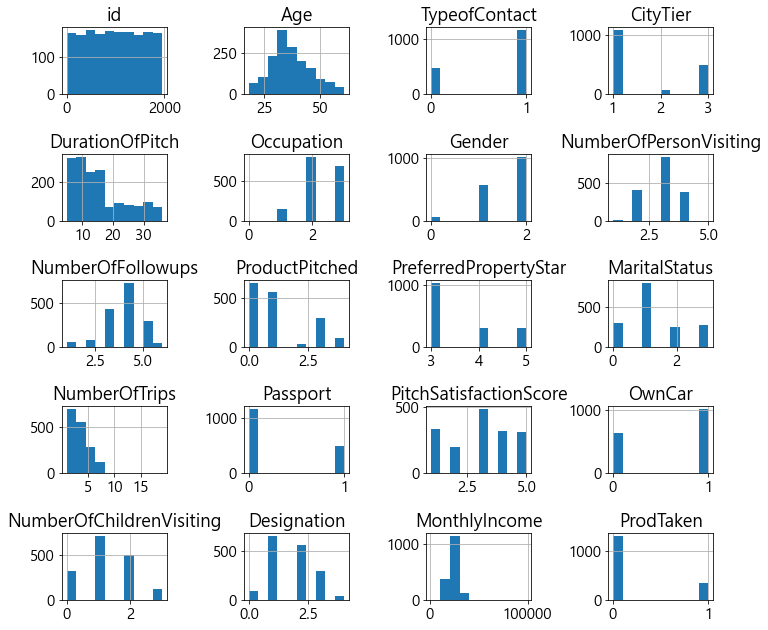

In [23]:
# 데이터 시각화
train_data2.hist(figsize=(10,9))
plt.tight_layout() # 그래프 간격 설정
plt.show()

- 본격적으로 데이터 분석 진행

## Age

In [24]:
train_data2['Age'].describe()

count    1649.000000
mean       37.021225
std         9.049227
min        18.000000
25%        31.000000
50%        36.000000
75%        43.000000
max        61.000000
Name: Age, dtype: float64

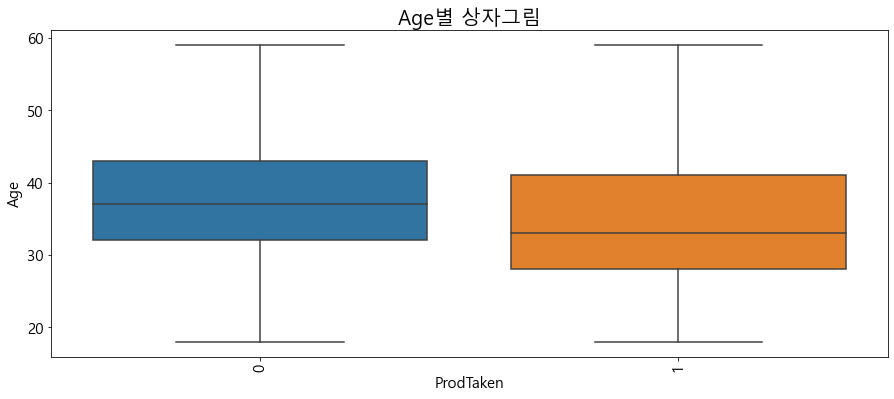

In [25]:
plt.figure(figsize=(15,6)) # 그래프 크기 조정
g = sns.boxplot(x='ProdTaken', y='Age', data=train_data2, showfliers=False)
g.set_title('Age별 상자그림', size = 20)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.show()

- 대체로 여행상품을 사는 사람들의 나이가 젊다는 것을 볼 수 있음

## TypeofContact 

- 고객의 제품 인지 방법 (회사의 홍보 or 스스로 검색)
- 회사의 홍보 : 0 , 스스로 검색 : 1

In [26]:
train_data2['TypeofContact'].describe()

count    1649.000000
mean        0.705882
std         0.455783
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: TypeofContact, dtype: float64

In [27]:
train_data2[train_data2['ProdTaken']==0]['TypeofContact'].value_counts()

1    946
0    367
Name: TypeofContact, dtype: int64

In [28]:
train_data2[train_data2['ProdTaken']==1]['TypeofContact'].value_counts()

1    218
0    118
Name: TypeofContact, dtype: int64

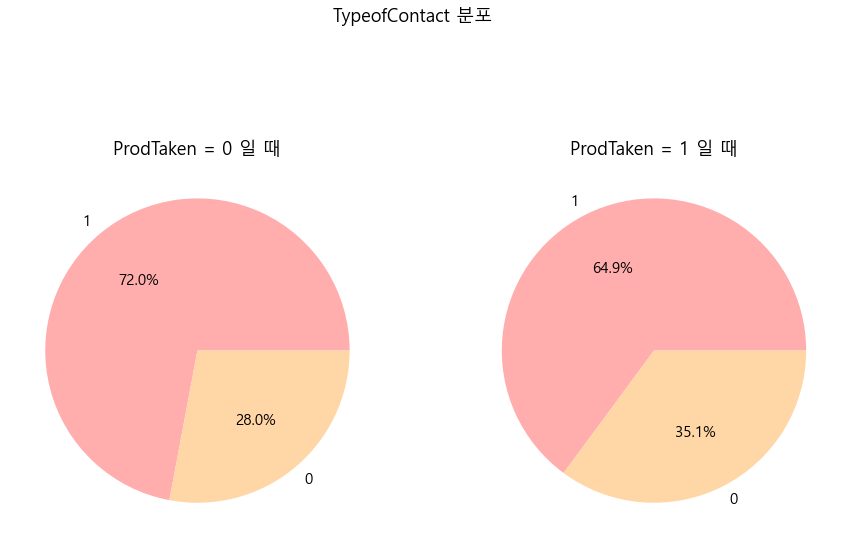

In [29]:
fig, axs = plt.subplots(1,2,figsize=(15,10)) # 그래프 크기 조정
fig.suptitle('TypeofContact 분포')
labels = [1,0]
colors = ['#ffadad', '#ffd6a5', '#fdffb6']
axs[0].pie(train_data2[train_data2['ProdTaken']==0]['TypeofContact'].value_counts(),colors=colors,labels=labels,autopct="%.1f%%")
axs[0].set_title('ProdTaken = 0 일 때')
axs[1].pie(train_data2[train_data2['ProdTaken']==1]['TypeofContact'].value_counts(),colors=colors,labels=labels,autopct="%.1f%%")
axs[1].set_title('ProdTaken = 1 일 때')
plt.show()

## CityTier 

- 주거 중인 도시의 등급. (인구, 시설, 생활 수준 기준) (1등급 > 2등급 > 3등급) 

In [30]:
train_data2['CityTier'].describe()

count    1649.000000
mean        1.646452
std         0.912721
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max         3.000000
Name: CityTier, dtype: float64

In [31]:
train_data2['CityTier'].value_counts()

1    1081
3     498
2      70
Name: CityTier, dtype: int64

In [32]:
train_data2[train_data2['ProdTaken']==0]['CityTier'].value_counts()

1    892
3    372
2     49
Name: CityTier, dtype: int64

In [33]:
train_data2[train_data2['ProdTaken']==1]['CityTier'].value_counts()

1    189
3    126
2     21
Name: CityTier, dtype: int64

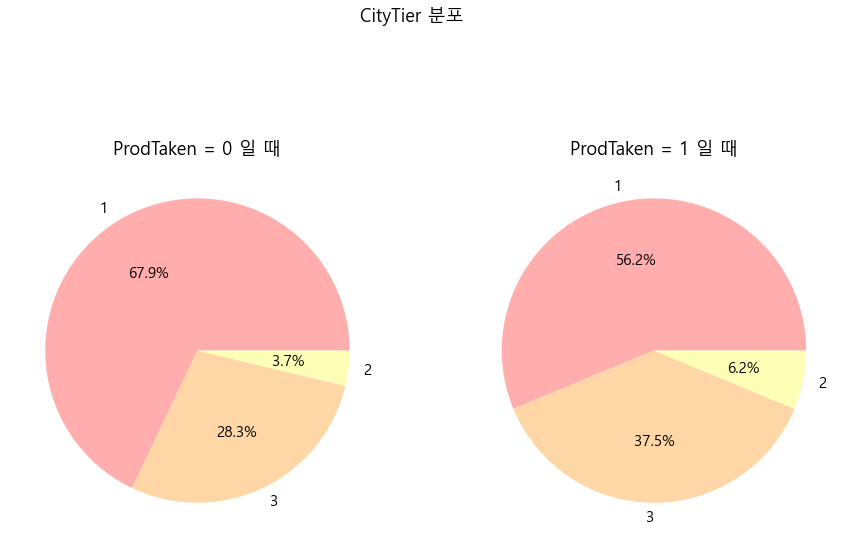

In [34]:
fig, axs = plt.subplots(1,2,figsize=(15,10)) # 그래프 크기 조정
fig.suptitle('CityTier 분포')
labels = [1,3,2]
colors = ['#ffadad', '#ffd6a5', '#fdffb6']
axs[0].pie(train_data2[train_data2['ProdTaken']==0]['CityTier'].value_counts(),colors=colors,labels=labels,autopct="%.1f%%")
axs[0].set_title('ProdTaken = 0 일 때')
axs[1].pie(train_data2[train_data2['ProdTaken']==1]['CityTier'].value_counts(),colors=colors,labels=labels,autopct="%.1f%%")
axs[1].set_title('ProdTaken = 1 일 때')
plt.show()

- 1등급이 낮아지고 2등급 3등급 비율이 올라감

## DurationOfPitch 

- 영업 사원이 고객에게 제공하는 프레젠테이션 기간

In [35]:
train_data2['DurationOfPitch'].describe()

count    1649.000000
mean       15.627653
std         8.149520
min         5.000000
25%         9.000000
50%        14.000000
75%        21.000000
max        36.000000
Name: DurationOfPitch, dtype: float64

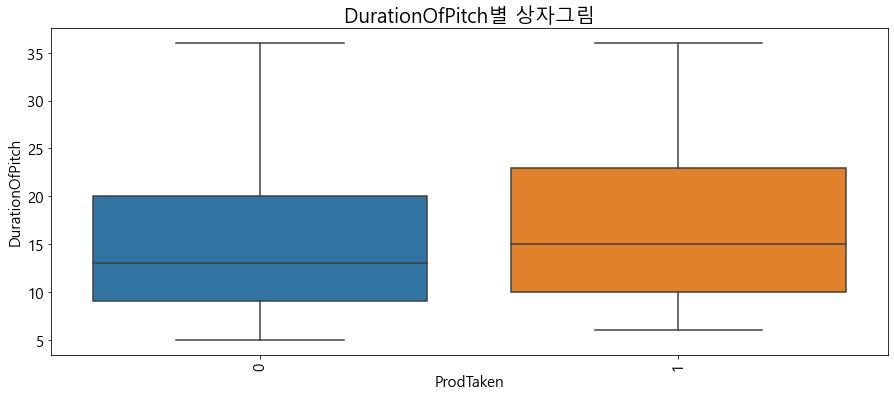

In [36]:
plt.figure(figsize=(15,6)) # 그래프 크기 조정
g = sns.boxplot(x='ProdTaken', y='DurationOfPitch', data=train_data2, showfliers=False)
g.set_title('DurationOfPitch별 상자그림', size = 20)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.show()

# 모델 학습

In [37]:
# 정규화를 위해 sklearn의 StandardScaler를 사용합니다.
from sklearn.preprocessing import StandardScaler

In [38]:
train_data2

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1,28,0,1,10,3,2,3,4,0,3,1,3,0,1,0,1,1,20384,0
1,4,29,0,1,7,3,2,3,5,0,4,1,3,0,4,0,1,1,21274,1
2,5,42,1,3,6,2,2,2,3,1,3,0,2,0,3,1,0,2,19907,0
3,6,32,1,1,29,3,2,4,4,1,3,0,3,1,5,1,1,2,24857,1
4,7,43,0,3,8,2,2,3,3,1,3,1,2,0,3,1,2,2,20675,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644,1951,28,1,1,10,3,2,3,5,0,3,2,2,0,1,1,2,1,20723,0
1645,1952,41,1,3,8,2,1,3,3,4,5,0,1,0,5,1,1,0,31595,0
1646,1953,38,0,3,28,3,1,3,4,0,3,0,7,0,2,1,2,1,21651,0
1647,1954,28,1,3,30,3,1,3,5,1,3,1,3,0,1,1,2,2,22218,0


In [40]:
scaler = StandardScaler()

# 학습용 데이터를 이용해 scaler를 학습시킵니다.
scaler.fit(train_data2[['MonthlyIncome']])

# 학습된 scaler를 사용해 데이터를 변환합니다.
scaled = scaler.transform(train_data2[['MonthlyIncome']])

# 변환된 값을 새로운 column에 할당합니다.
train_data2[['MonthlyIncome']] = scaled


In [42]:
train_data2

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1,28,0,1,10,3,2,3,4,0,3,1,3,0,1,0,1,1,-0.593366,0
1,4,29,0,1,7,3,2,3,5,0,4,1,3,0,4,0,1,1,-0.401888,1
2,5,42,1,3,6,2,2,2,3,1,3,0,2,0,3,1,0,2,-0.695990,0
3,6,32,1,1,29,3,2,4,4,1,3,0,3,1,5,1,1,2,0.368972,1
4,7,43,0,3,8,2,2,3,3,1,3,1,2,0,3,1,2,2,-0.530759,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644,1951,28,1,1,10,3,2,3,5,0,3,2,2,0,1,1,2,1,-0.520432,0
1645,1952,41,1,3,8,2,1,3,3,4,5,0,1,0,5,1,1,0,1.818612,0
1646,1953,38,0,3,28,3,1,3,4,0,3,0,7,0,2,1,2,1,-0.320779,0
1647,1954,28,1,3,30,3,1,3,5,1,3,1,3,0,1,1,2,2,-0.198792,0


In [49]:
train_input = train_data2.drop(columns=['id','ProdTaken'])

In [50]:
train_input

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,28,0,1,10,3,2,3,4,0,3,1,3,0,1,0,1,1,-0.593366
1,29,0,1,7,3,2,3,5,0,4,1,3,0,4,0,1,1,-0.401888
2,42,1,3,6,2,2,2,3,1,3,0,2,0,3,1,0,2,-0.695990
3,32,1,1,29,3,2,4,4,1,3,0,3,1,5,1,1,2,0.368972
4,43,0,3,8,2,2,3,3,1,3,1,2,0,3,1,2,2,-0.530759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644,28,1,1,10,3,2,3,5,0,3,2,2,0,1,1,2,1,-0.520432
1645,41,1,3,8,2,1,3,3,4,5,0,1,0,5,1,1,0,1.818612
1646,38,0,3,28,3,1,3,4,0,3,0,7,0,2,1,2,1,-0.320779
1647,28,1,3,30,3,1,3,5,1,3,1,3,0,1,1,2,2,-0.198792


In [47]:
train_target = train_data2['ProdTaken']

In [48]:
train_target

0       0
1       1
2       0
3       1
4       0
       ..
1644    0
1645    0
1646    0
1647    0
1648    1
Name: ProdTaken, Length: 1649, dtype: int64

In [ ]:
import time
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
start = time.time() # 시작 시간 저장

# 랜덤 포레스트의 parameter 범위를 정의한다.
RF_params = {
    'n_estimators' : [50,100,150,200,300,500,1000],
    'max_features' : ['auto','sqrt'],
    'max_depth' : [8,10,12,14,16],
    'min_samples_leaf' : [1,2,4,8],
    'min_samples_split' : [2,3,5,10]}

# GridSearchCV를 이용하여 dict에Randomforest 모델을 저장한다. 
RF_models = {
    'RF': GridSearchCV(
    RandomForestRegressor(random_state=42), param_grid=RF_params, n_jobs=-1
    ).fit(train_input, train_target).best_estimator_}

print(f'걸린시간 : {np.round(time.time()-start, 3)}초') # 현재시간 - 시작시간(단위 초)